# Taller gradiente descendente

## Nombres
### Luisa Fernanda Cotte Sánchez y Cristian Giovanny Sánchez Pineda

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
from matplotlib import pyplot as plt

Carga de datos base:

In [2]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

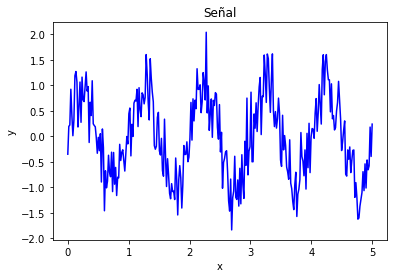

In [3]:
plt.plot(x, t,'b-')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Señal')
plt.show()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

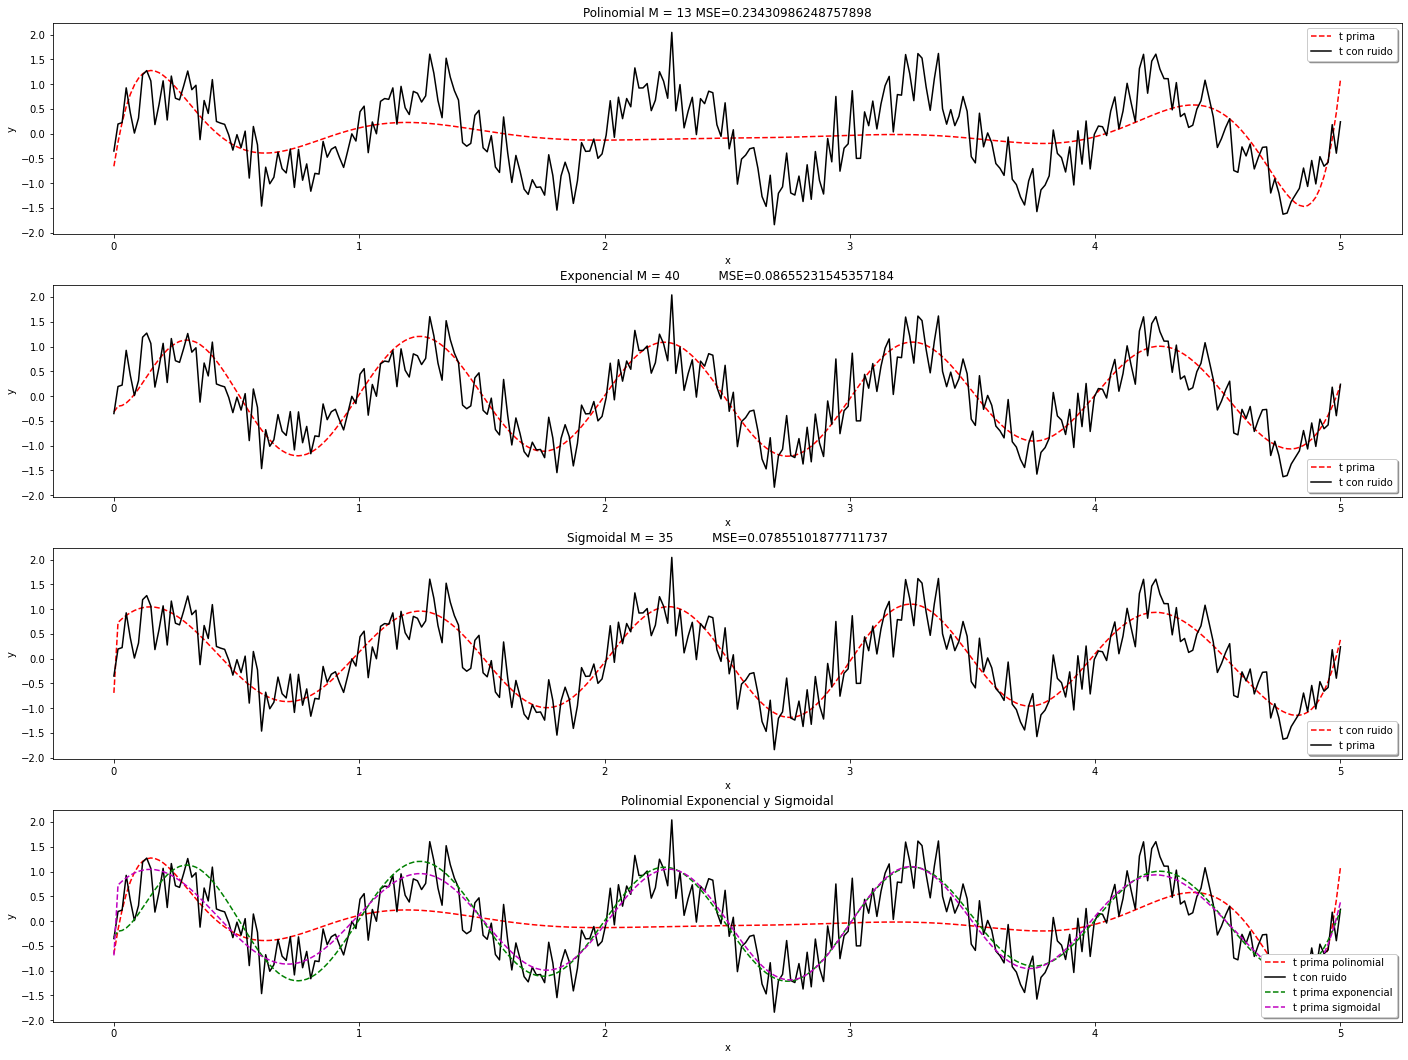

In [40]:
def get_polinomial(x, i):
    '''
    Obtiene la polinomial de x a la i
    '''
    return x**i

def get_exponential(x, miu, s=0.007):
    '''
    Obtiene la exponencial de x dependiendo de la función base
    '''
    return np.exp((-(((x-miu)**2)/(2*(s**2)))))

def get_sigmoidal(x, miu, s=0.01):
    '''
    Obtiene la sigmoidal de x dependiendo de la función base
    '''
    return 1/(1+np.exp(-((x-miu)/s)))

def polinomial(X, m, x, s=0):
    '''
    Llena la matriz X usando la función base polinomial
    '''
    i_limit, j_limit = X.shape
    for i in range(i_limit):
        for j in range(j_limit):
            X[i][j] = get_polinomial(x[i], j)
    X[:, 0] = 1
            
def exponential(X, m, x, s=1):
    '''
    Llena la matriz X usando la función base exponencial
    '''
    i_limit, j_limit = X.shape
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j]= get_exponential(x[i], m[j], s)
    X[:,0] = 1
            
def sigmoidal(X, m, x, s=1):
    '''
    Llena la matriz X usando la función base sigmoidal
    '''
    i_limit, j_limit = X.shape
    
    for i in range(1, i_limit):
        for j in range(j_limit):
            X[i][j] = get_sigmoidal(x[i], m[j], s)
    X[:,0]=1

def get_phi(fn, x, m, s=1):
    '''
    Obtiene phi
    '''
    medium = np.linspace(0,5, m)
    X = np.zeros((len(x),m)) #Tamaño de t por m
    fn(X, medium, x, s)
    return X

def mean_square_error(Y, w):
    '''
    Calcula el error mediante la formula
    '''
    i_limit, j_limit = Y.shape
    error = 0    
    sum = 0
    for i in range(i_limit):
        for j in range(j_limit):
            sum += (Y[i][j]-t[i])**2
    error = (sum/(2*len(t)))
    
    return error

def get_W(phi,c=t):
    '''
    Calcula el W mediante la formula
    '''
    T = np.array([c])
    W = ((np.linalg.inv((phi.T.dot(phi)))).dot(phi.T)).dot(T.T)
    return W

def get_y_values(Y):
    '''
    Método que permite obtener los valores de Y
    '''
    i_limit, j_limit = Y.shape
    y = []
    for i in range(i_limit):
        for j in range(j_limit):
            y.append(Y[i][j])
    return y

#x = np.arange(0,len(t),1)#Tabular valores de x

#print(W)
X = get_phi(polinomial, x, 13)#Se crea phi
W = get_W(X)#Se Crea el primer W
Y = X.dot(W)#Se crean las predicciones
mse1 = mean_square_error(Y, W)#Se crea el error cuadrático medio
y = get_y_values(Y)#Valores de y para graficar

#x1 = np.linspace(0,1,len(t)) #Asociado a la media 

X1 = get_phi(exponential, x, 40, 0.8)
W1 = get_W(X1)
Y1 = X1.dot(W1)
y1 = get_y_values(Y1)
mse2 =  mean_square_error(Y1, W1)#Cambiar el w


X2 = get_phi(sigmoidal, x, 35, t.std())
W2 = get_W(X2)
Y2 = X2.dot(W2)
y2 = get_y_values(Y2)
mse3 =  mean_square_error(Y2, W2)


plt.subplots(4,1, figsize=(20,15))
plt.subplot(4,1,1)
plt.tight_layout(pad=3.0)
plt.plot(x, y, 'r--', x, t, 'k')
plt.title("Polinomial M = 13 MSE="+str(mse1))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima', 't con ruido'), loc='upper right', shadow=True)


plt.subplot(4,1,2)
plt.plot(x,y1,'r--', x, t, 'k')
plt.title("Exponencial M = 40          MSE="+str(mse2))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima', 't con ruido'), loc='lower right', shadow=True)

plt.subplot(4,1,3)
plt.plot(x, y2, 'r--', x, t, 'k')
plt.title("Sigmoidal M = 35          MSE="+str(mse3))
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t con ruido', 't prima'), loc='lower right', shadow=True)


plt.subplot(4,1,4)
plt.plot(x, y, 'r--', x, t, 'k', x, y1, 'g--', x, y2, 'm--')
plt.title("Polinomial Exponencial y Sigmoidal")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(('t prima polinomial', 't con ruido', 't prima exponencial', 't prima sigmoidal'), loc='lower right', shadow=True)


#En la ultima con POLINOMIAL, EXPONENCIAL, SIGMOIDAL, TCON RUIDO 
plt.show()

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)